In [20]:
stations_coords = [
    (30.29068, -97.74292), #Nueces & 26th
    (30.283, -97.7375), # 21st & Speedway PCL
    (30.28395, -97.74198), # Guadalupe & 21st
    (30.28576, -97.74181), # UT West Mall @ Guad
    (30.28953, -97.73695), # Dean Keeton & Speedway
    (30.2874, -97.7478), # 23rd & San Gabriel

    (30.28354, -97.73953), # 21st & University
    (30.2862, -97.74516), # 22nd 1/2 Rio Grande
    (30.2853, -97.7467), # 22nd & Pearl
    (30.29333, -97.74412), # Rio Grande & 28th
    (30.2898, -97.74041), # Dean Keeton & Whitis
    (30.2856, -97.7335) # 23rd San Jac @ DKR Stadium
]

#destination points (picked out by me, subject to change)
destinations_coords = [
    (30.2910, -97.7430), #26 West
    (30.2843, -97.7372), #McCombs
    (30.2838, -97.7418), #Target
    (30.2865, -97.7410), #Union Building
    (30.2880, -97.7365), #PMA
    (30.2890, -97.7460), #Union on 24th

    (30.2885, -97.7375), #Welch
    (30.2895, -97.7425), #Rise
    (30.2895, -97.7470), #Axis West
    (30.2813, -97.7368) #Rec
]

In [21]:
def normalize_coords(station_coords, destination_coords):
    #find the mean of the coordinates
    
    sum_lat = 0
    sum_lon = 0
    for coord in station_coords:
        sum_lat += coord[0]
        sum_lon += coord[1]

    for coord in destination_coords:
        sum_lat += coord[0]
        sum_lon += coord[1]
    
    mean = (sum_lat/(len(station_coords) + len(destination_coords)), sum_lon/(len(station_coords) + len(destination_coords)))
    print("Means:", mean)

    #normalize the coordinates
    normalized_station_coords = []
    normalized_destination_coords = []

    for coord in station_coords:
        new_coord = (10000/12*(coord[0] - mean[0]), 10000/12*(coord[1] - mean[1]))
        normalized_station_coords.append(new_coord)
        print(new_coord)
    for coord in destination_coords:
        new_coord = (10000/12*(coord[0] - mean[0]), 10000/12*(coord[1] - mean[1]))
        print(new_coord)
        normalized_destination_coords.append(new_coord)
    return normalized_station_coords, normalized_destination_coords


In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#station_coords and destination_coords are both a list of tuples
def create_graph_from_coordinates(stations_coords, destinations_coords):

    total_nodes = np.array(stations_coords + destinations_coords)

    #distance calculation from hasith
    distances = np.zeros((total_nodes.shape[0], total_nodes.shape[0]))
    for i in range(total_nodes.shape[0]):
        for j in range(i + 1, total_nodes.shape[0]):
            distances[i, j] = np.linalg.norm(total_nodes[i] - total_nodes[j])
            distances[j, i] = distances[i, j]

    G = nx.Graph()

    #add stations
    for i, coord in enumerate(stations_coords):
        G.add_node(f"Station {i+1}", pos=(coord[1], coord[0]), type='station', data=None)

    #add destination nodes
    for i, coord in enumerate(destinations_coords):
        G.add_node(f"Destination {i+1}", pos=(coord[1], coord[0]), type='end_destination', data=None)

    #add edges
    all_nodes = list(G.nodes)
    for i in range(len(all_nodes)):
        for j in range(i + 1, len(all_nodes)):
            G.add_edge(all_nodes[i], all_nodes[j], weight=distances[i, j])

    #positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    node_colors = ['lightblue' if G.nodes[node]['type'] == 'station' else 'red' for node in G.nodes]
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors)
    plt.title("NetworkX Graph of Stations and End Destinations")
    plt.show()

    #create dicts for station+nodes and end_destination_nodes
    station_nodes = {node: data for node, data in G.nodes(data=True) if data['type'] == 'station'}
    end_destination_nodes = {node: data for node, data in G.nodes(data=True) if data['type'] == 'end_destination'}

    return G, station_nodes, end_destination_nodes

Means: (30.287067727272724, -97.74125818181818)
(3.010227272728372, -1.384848484846657)
(-3.389772727269147, 3.1318181818207336)
(-2.598106060602845, -0.6015151515133729)
(-1.0897727272703626, -0.4598484848491088)
(2.051893939395792, 3.59015151515744)
(0.2768939393978561, -5.45151515151332)
(-2.93977272727138, 1.440151515150016)
(-0.7231060606027739, -3.2515151515137104)
(-1.4731060606039867, -4.53484848485175)
(5.21856060606396, -2.3848484848443263)
(2.276893939396156, 0.7068181818207602)
(-1.2231060606045694, 6.465151515146299)
(3.2768939393967855, -1.4515151515107998)
(-2.306439393935378, 3.3818181818171906)
(-2.7231060606040343, -0.4515151515131303)
(-0.4731060606033566, 0.21515151515198266)
(0.7768939393966908, 3.9651515151462036)
(1.6102272727310427, -3.9515151515108946)
(1.1935606060623865, 3.1318181818207336)
(2.0268939393967385, -1.034848484853986)
(2.0268939393967385, -4.784848484848207)
(-4.806439393935473, 3.715151515149747)


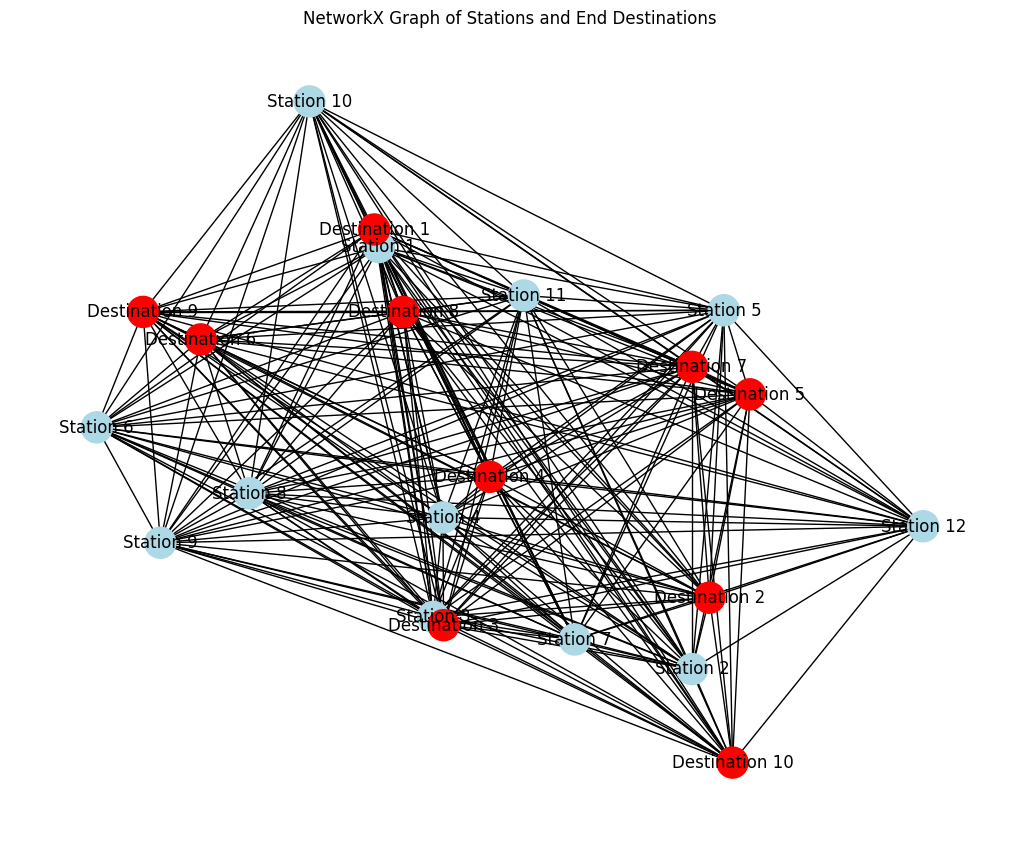

Average edge length (TOTAL): 5.3580757993075006
Minimum edge length (TOTAL): 0.19525624189861404


In [23]:
def calculate_average_edge_length(graph):
    # Get all edge weights
    edge_weights = [data['weight'] for _, _, data in graph.edges(data=True)]
    
    # Calculate the average
    average_length = sum(edge_weights) / len(edge_weights) if edge_weights else 0
    return average_length

def calculate_minimum_edge_length(graph):
    # Get all edge weights
    edge_weights = [data['weight'] for _, _, data in graph.edges(data=True)]
    
    # Calculate the minimum
    minimum_length = min(edge_weights) if edge_weights else None
    return minimum_length


norm_stations, norm_destinations = normalize_coords(stations_coords, destinations_coords)
# Usage after creating the graph
G, station_nodes, end_destination_nodes = create_graph_from_coordinates(norm_stations, norm_destinations)
average_edge_length = calculate_average_edge_length(G)
min_edge_length = calculate_minimum_edge_length(G)


print(f"Average edge length (TOTAL): {average_edge_length}")
print(f"Minimum edge length (TOTAL): {min_edge_length}")

Means: (30.28714, -97.74092999999998)
(3.2166666666662755, -1.7250000000146315)
(-2.366666666665888, 3.1083333333133587)
(-2.7833333333345442, -0.7250000000169621)
(-0.5333333333338668, -0.058333333351849134)
(0.7166666666661807, 3.691666666642372)
(1.5500000000005325, -4.2250000000147265)
(1.1333333333318762, 2.858333333316902)
(1.966666666666228, -1.3083333333578178)
(1.966666666666228, -5.058333333352039)
(-4.866666666665983, 3.441666666645915)


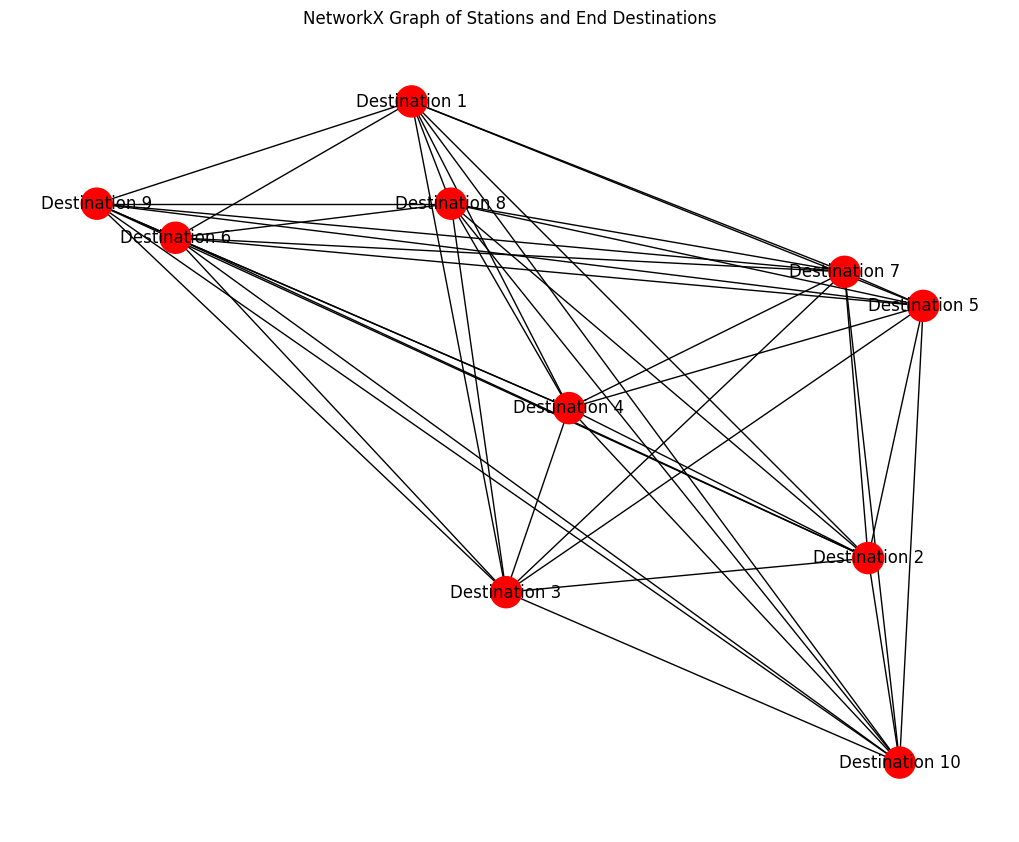

Average edge length (just btwn stations): 5.284430560803614
Minimum edge length (just btwn stations): 0.9316949906174449


In [24]:
def calculate_average_edge_length(graph):
    # Get all edge weights
    edge_weights = [data['weight'] for _, _, data in graph.edges(data=True)]
    
    # Calculate the average
    average_length = sum(edge_weights) / len(edge_weights) if edge_weights else 0
    return average_length

def calculate_minimum_edge_length(graph):
    # Get all edge weights
    edge_weights = [data['weight'] for _, _, data in graph.edges(data=True)]
    
    # Calculate the minimum
    minimum_length = min(edge_weights) if edge_weights else None
    return minimum_length

stations_coords = []
norm_stations, norm_destinations = normalize_coords(stations_coords, destinations_coords)
# Usage after creating the graph
G, station_nodes, end_destination_nodes = create_graph_from_coordinates(norm_stations, norm_destinations)
average_edge_length = calculate_average_edge_length(G)
min_edge_length = calculate_minimum_edge_length(G)


print(f"Average edge length (just btwn stations): {average_edge_length}")
print(f"Minimum edge length (just btwn stations): {min_edge_length}")
